# ANN & MNIST : exercise

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

In [ ]:
train_x[0]

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_x.shape[0]

60000

In [3]:
train_x = train_x.reshape( train_x.shape[0], -1 )
test_x = test_x.reshape( test_x.shape[0], -1 )

In [4]:
train_x.shape, train_y.shape

((60000, 784), (60000,))

* min-max scaling

In [5]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [6]:
train_x.max(), train_x.min()

(255, 0)

In [7]:
train_x = (train_x - min_n) / (max_n - min_n)
# train_x = train_x / max_n
test_x = (test_x - min_n) / (max_n - min_n)
# test_x = test_x / max_n

In [8]:
train_x.max(), train_x.min()

(1.0, 0.0)

* target feature : One-hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
class_n = len(set(train_y))

In [11]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [12]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [13]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_x.shape, train_y.shape

In [64]:
########################
# 모델링 I : .fit( ) 까지! Sequential API
########################
# 1. 세션 클리어
clear_session()

# 2. 모델 발판 선언
model = Sequential()

# 3. 레이어 블록 조립
model.add( Input(shape=(28,28)) )
model.add( Flatten() )
model.add( Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [65]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   min_delta=0,                # 0이면 최소한 성능이 나빠지지 않으면 괜찮아!
                   patience=5,                 # 성능이 개선되지 않는다면 몇번이나 참을래
                   verbose=1,                  # 몇 epochs가 최선인지 보여줌
                   restore_best_weights=True)  # 최선의 epochs의 가중치로 돌려줌!

In [66]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5026 - accuracy: 0.8697 - val_loss: 0.3183 - val_accuracy: 0.9124
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.9125 - val_loss: 0.2885 - val_accuracy: 0.9185
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.9184 - val_loss: 0.2749 - val_accuracy: 0.9246
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.9214 - val_loss: 0.2702 - val_accuracy: 0.9245
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9234 - val_loss: 0.2673 - val_accuracy: 0.9266
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9251 - val_loss: 0.2654 - val_accuracy: 0.9258
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2638 - accuracy: 0.9266 - val_loss: 0.2631 - val_accuracy:

In [17]:
########################
# 모델링 I : .fit( ) 까지! Functional API
########################
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기
il = Input( shape=(784,) )
fl = Flatten()(il)
ol = Dense(10, activation='softmax')(fl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam() )

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [18]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [19]:
model.fit(train_x, train_y, epochs=50, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5131 - accuracy: 0.8672 - val_loss: 0.3164 - val_accuracy: 0.9156
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3182 - accuracy: 0.9111 - val_loss: 0.2870 - val_accuracy: 0.9197
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.9166 - val_loss: 0.2770 - val_accuracy: 0.9228
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2817 - accuracy: 0.9213 - val_loss: 0.2721 - val_accuracy: 0.9244
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9230 - val_loss: 0.2697 - val_accuracy: 0.9248
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9255 - val_loss: 0.2639 - val_accuracy: 0.9263
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9266 - val_loss: 0.2610 - val_accuracy:

In [21]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.04%
테스트 정확도 : 92.51%


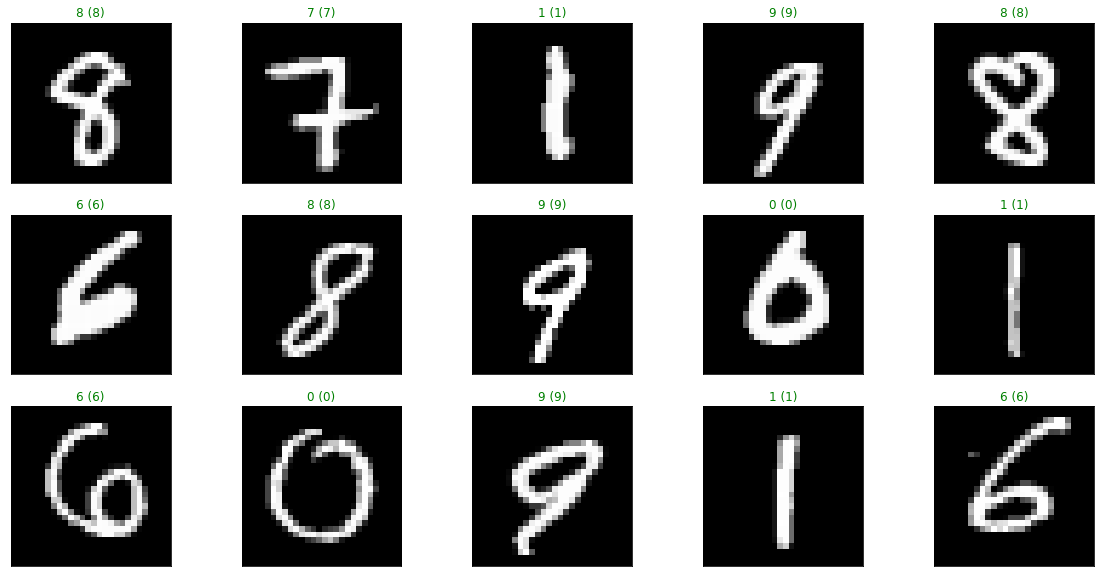

In [22]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 3853
다음 그림은 숫자 6 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 1.  0.  0.  0.  0. 96.  0.  0.  1.  0.]
틀렸어요


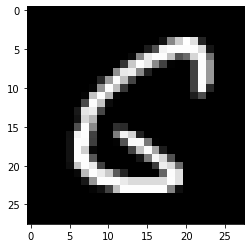

In [23]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [24]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.9251


[0.26551583409309387, 0.9251000285148621]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [25]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [14]:
#########################
# 모델링 II : .fit( ) 까지! : Functional API
#########################
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기
il = Input(shape=(784,))
# fl = Flatten()(il)
hl = Dense(512, activation='relu')(il)
hl = Dense(512, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-train

In [15]:
es = EarlyStopping(monitor='val_loss',        # 무엇을 관측할래?
                   min_delta=0,               # 0이면, 최소한 성능이 나빠지지만 않아도 괜찮아
                   patience=5,                # 근데, 최고 성능에서 5번까지 참았는데 개선되지 않으면 멈출래
                   verbose=1,                 # 어디서 멈췄는지 보여주는거야
                   restore_best_weights=True) # 최고 성능의 가중치를 모델에 넣을거야!

In [16]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          epochs=50, verbose=1)

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2333 - accuracy: 0.9298 - val_loss: 0.1348 - val_accuracy: 0.9593
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1122 - accuracy: 0.9681 - val_loss: 0.1154 - val_accuracy: 0.9676
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9765 - val_loss: 0.1117 - val_accuracy: 0.9697
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9814 - val_loss: 0.1024 - val_accuracy: 0.9733
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0566 - accuracy: 0.9838 - val_loss: 0.1398 - val_accuracy: 0.9684
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.1144 - val_accuracy: 0.9760
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.1034 - val_accuracy:

In [17]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.41%
테스트 정확도 : 97.57%


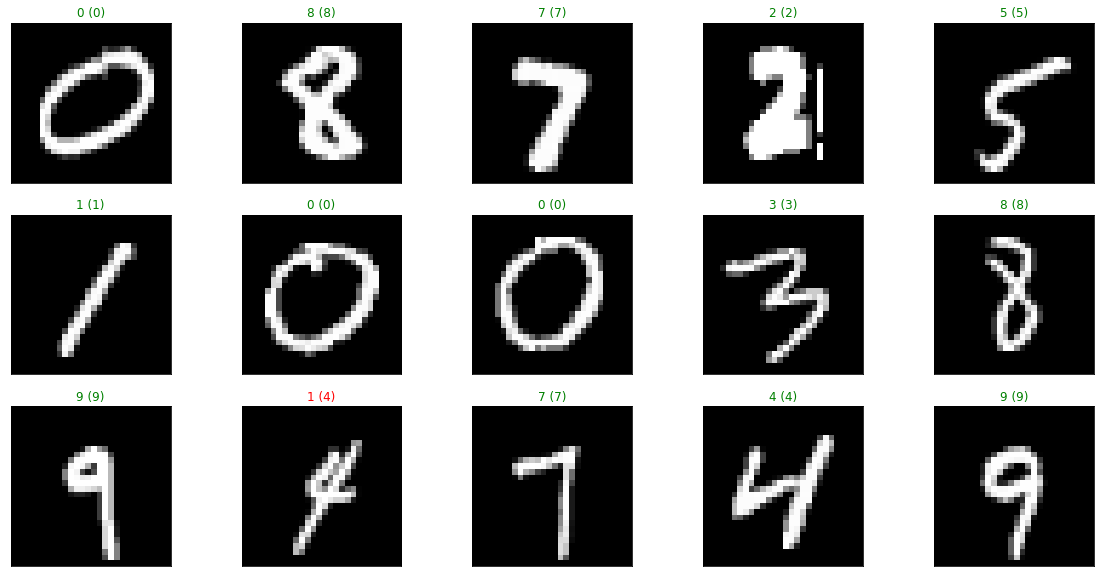

In [18]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 6011
다음 그림은 숫자 3 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [39.  1. 10.  7.  1. 21.  2.  4.  5.  5.]
틀렸어요


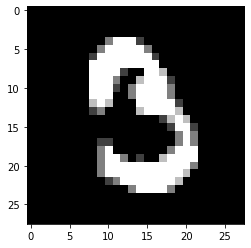

In [22]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [23]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9757


[0.08711860328912735, 0.9757000207901001]